In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")

## Датасет по Титанику

#### Столбцы:

* **PassengerId** - id пассажира
* **Survived** - выжил пассажир или нет (0 и 1 соответственно)
* **Pclass** - класс билета
* **Name** - ФИО
* **Sex** - пол
* **Age** - возраст
* **SibSp** - количество братьев и сестер / супругов на борту 
* **Parch** - количество родителей / детей на борту 
* **Ticket** - номер билета
* **Fare** - стоимость билета
* **Cabin** - номер каюты
* **Embarked** - порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

In [169]:
df = pd.read_csv("data_tms.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [170]:
print("Форма датасета:", df.shape) 

Форма датасета: (891, 12)


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [172]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Очень много пропусков в cabin (возможно, можно будет перевести в бинарный признак). В age их тоже много (можно заполнить средним значением). В embarked всего 2 пропуска и их можно будет заполнить наиболее часто встречаемыми портами.

In [173]:
print("Полные дубликаты строк:", df.duplicated().sum())
print("Дубликаты PassengerId:", df["PassengerId"].duplicated().sum())
print("Дубликаты Name:", df["Name"].duplicated().sum())
print("Дубликаты Ticket:", df["Ticket"].duplicated().sum())
print("Дубликаты Cabin:", df["Cabin"].duplicated().sum())

Полные дубликаты строк: 0
Дубликаты PassengerId: 0
Дубликаты Name: 0
Дубликаты Ticket: 210
Дубликаты Cabin: 743


Можно увидеть, что есть дубликаты билетов (возможно, у семей). Большое количество дубликатов в каютах связано с тем, что 687 значений имеет NaN. И всего 56 дубликатов за исключением NaN.

In [174]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Можно увидеть, что в стоимости билетов есть нулевые значения. Общая доля выживших примерно 38%. Тип билетов показыает перекос в сторону 3-го класса.

### Целевая переменная - Survived.

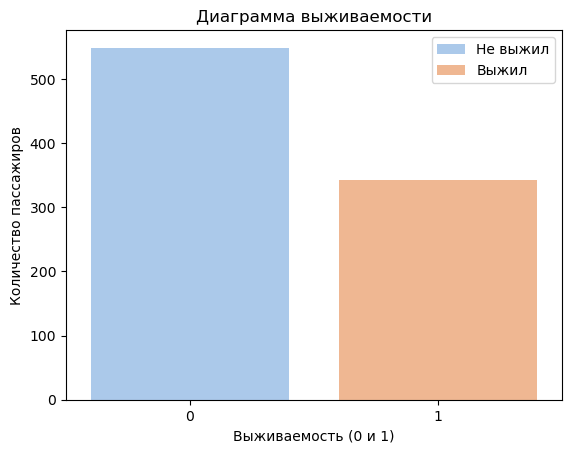

In [175]:
sns.countplot(
    x="Survived",
    data=df,
    hue="Survived"
)

plt.title("Диаграмма выживаемости")
plt.xlabel("Выживаемость (0 и 1)")
plt.ylabel("Количество пассажиров")
plt.legend(["Не выжил", "Выжил"])
plt.show()

Согласно диаграмме видно, что большинство погибло.

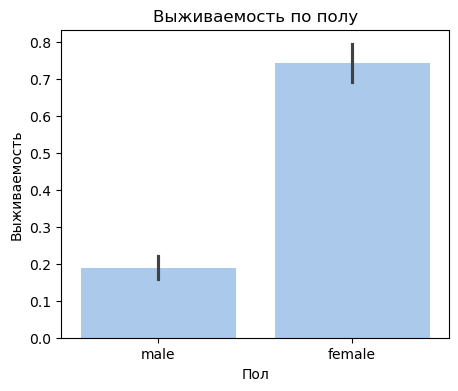

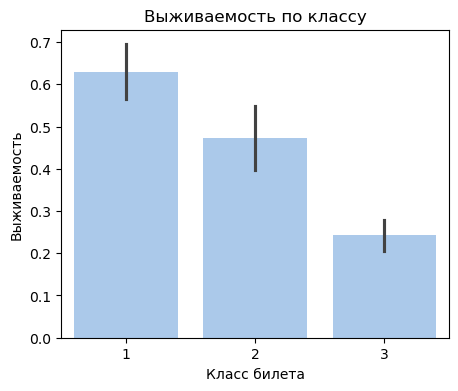

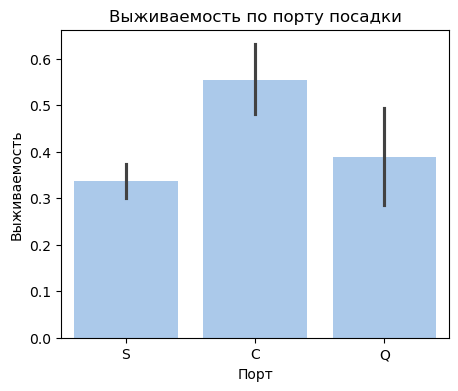

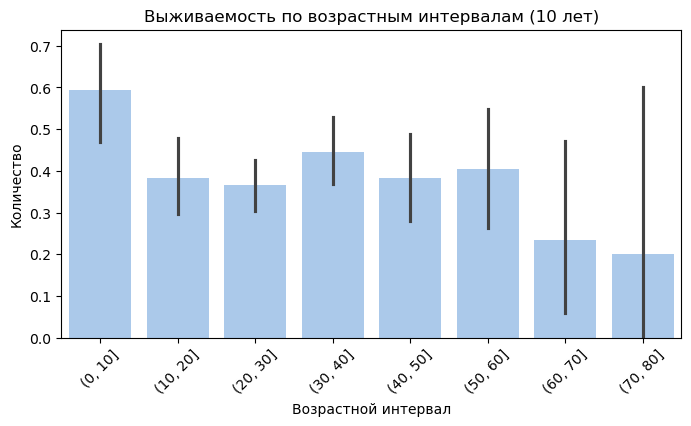

In [186]:
# Пол
fig, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=df, x="Sex", y="Survived", ax=ax)
ax.set_title("Выживаемость по полу")
ax.set_xlabel("Пол")
ax.set_ylabel("Выживаемость")
plt.show()

# Класс
fig, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=df, x="Pclass", y="Survived", ax=ax)
ax.set_title("Выживаемость по классу")
ax.set_xlabel("Класс билета")
ax.set_ylabel("Выживаемость")
plt.show()

# Порт
fig, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=df, x="Embarked", y="Survived", ax=ax)
ax.set_title("Выживаемость по порту посадки")
ax.set_xlabel("Порт")
ax.set_ylabel("Выживаемость")
plt.show()

# Возраст

age_survival = df.groupby("Age")["Survived"].mean()
df["AgeBin"] = pd.cut(df["Age"], bins=range(0, 81, 10))  # интервалы по 10 лет

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=df, x="AgeBin", y="Survived", ax=ax)
ax.set_title("Выживаемость по возрастным интервалам (10 лет)")
ax.set_xlabel("Возрастной интервал")
ax.set_ylabel("Количество")
plt.xticks(rotation=45)
plt.show()

Женщины выживали гораздо чаще мужчин.

1-й класс имел больше шансов, 3-й — меньше всего.

По портам: C > Q > S по доле выживших.

Дети имели больше шансов выжить. Пожилые меньше всего.

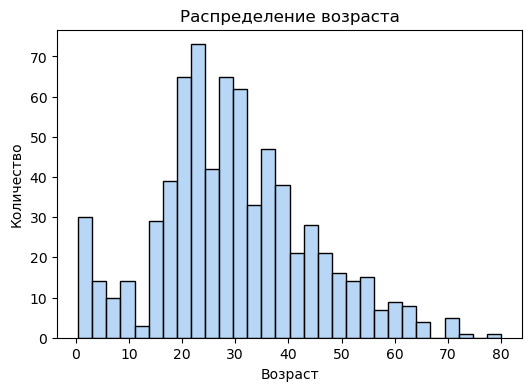

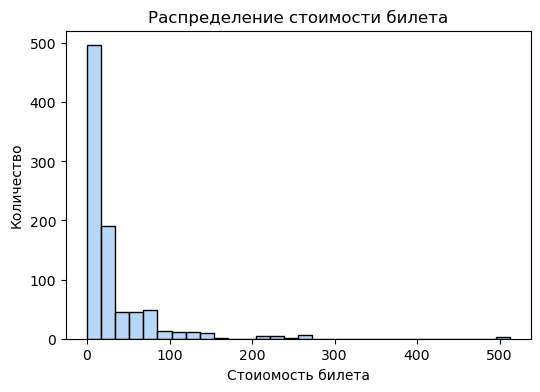

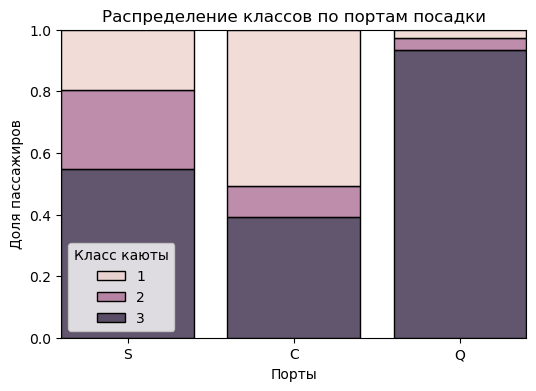

In [177]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df["Age"].dropna(), bins=30, ax=ax)
ax.set_title("Распределение возраста")
ax.set_xlabel("Возраст")
ax.set_ylabel("Количество")
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df["Fare"], bins=30, ax=ax)
ax.set_title("Распределение стоимости билета")
ax.set_xlabel("Стоиомость билета")
ax.set_ylabel("Количество")
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=df, x="Embarked", hue="Pclass", multiple="fill", shrink=0.8, ax=ax, legend=True)
ax.set_title("Распределение классов по портам посадки")
ax.set_ylabel("Доля пассажиров")
ax.set_xlabel("Порты")
leg = ax.get_legend()
leg.set_title("Класс каюты")
plt.show()


На Титанике больше всего было людей возраста 20-40 лет. У тарифа есть большой выброс, его стоит в дальнейшем логарифмировать. Наибольшее количество пассажиров первого класса сели в Шербуре.

In [178]:
df['LastName'] = df['Name'].str.split(',').str[0]
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["FamilyID"] = (
    df["LastName"] + "_" +
    df["Pclass"].astype(str) + "_" +
    df["Embarked"].fillna("U") + "_" +
    df["FamilySize"].astype(str)
)

df.drop(["Name", "SibSp", "Parch"], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,AgeBin,LastName,FamilySize,FamilyID
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]",Braund,2,Braund_3_S_2
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C,"(30.0, 40.0]",Cumings,2,Cumings_1_C_2
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]",Heikkinen,1,Heikkinen_3_S_1
3,4,1,1,female,35.0,113803,53.1000,C123,S,"(30.0, 40.0]",Futrelle,2,Futrelle_1_S_2
4,5,0,3,male,35.0,373450,8.0500,NaN,S,"(30.0, 40.0]",Allen,1,Allen_3_S_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,211536,13.0000,NaN,S,"(20.0, 30.0]",Montvila,1,Montvila_2_S_1
887,888,1,1,female,19.0,112053,30.0000,B42,S,"(10.0, 20.0]",Graham,1,Graham_1_S_1
888,889,0,3,female,NaN,W./C. 6607,23.4500,NaN,S,NaN,Johnston,4,Johnston_3_S_4
889,890,1,1,male,26.0,111369,30.0000,C148,C,"(20.0, 30.0]",Behr,1,Behr_1_C_1


In [179]:
df["FamilySize"].value_counts().sort_index()

FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

Больше всего одиночек (FamilySize=1), семьи 2–4 встречаются часто. Большие семьи (5+) редки.

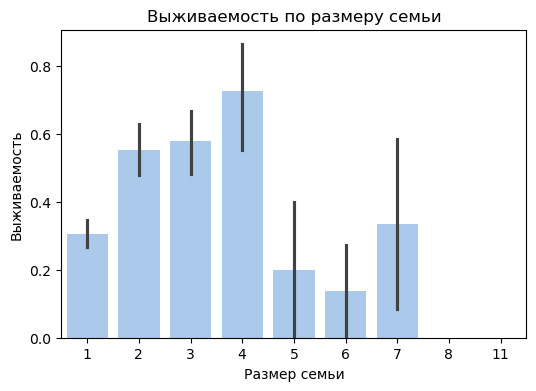

In [180]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=df, x="FamilySize", y="Survived", ax=ax)
ax.set_title("Выживаемость по размеру семьи")
ax.set_xlabel("Размер семьи")
ax.set_ylabel("Выживаемость")
plt.show()

Наилучшие шансы у малых семей (2–4 чел.). Одиночки и очень большие семьи выживали хуже. 

In [181]:
df.groupby("FamilySize")["Survived"].mean().round(2)

FamilySize
1     0.30
2     0.55
3     0.58
4     0.72
5     0.20
6     0.14
7     0.33
8     0.00
11    0.00
Name: Survived, dtype: float64

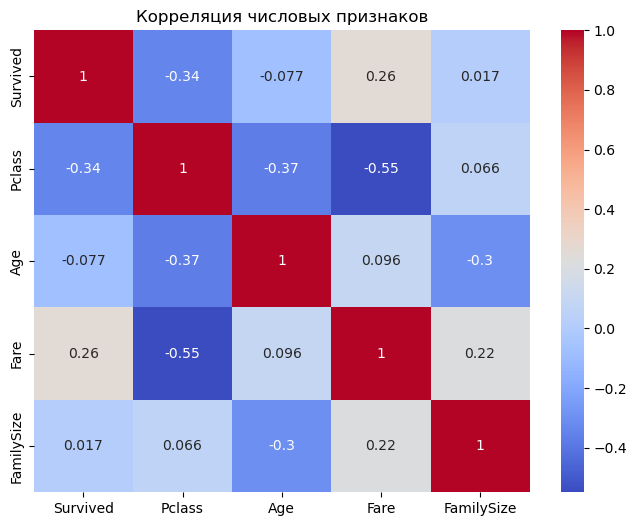

In [182]:
corr = df[["Survived","Pclass","Age", "Fare","FamilySize"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Корреляция числовых признаков")
plt.show()

Survived отрицательно коррелирует с Pclass (чем выше класс, тем больше шанс).

Survived положительно коррелирует с Fare (дорогой билет, значит больше шанс).

С размером семьи корреляция слабая, но графики показали, что 2–4 чел. лучше.

##### Рассмотрим категориальные признаки.

In [183]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [184]:
df.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [185]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Женщины выживали гораздо чаще.

У 1-го класса высокая выживаемость, у 3-го низкая.

Пассажиры из порта C чаще спасались, чем из порта S.

Сильнее всего на выживаемость влияли: Sex, Pclass, Fare, Embarked (пол, класс билета, стоимость билетап и порт посадки). Порт влияет на выживаемость не напрямую, а через социальный статус и класс билетов пассажиров.

Age имеет эффект (дети чаще спасались), но общая корреляция слабая.

### Вывод:

В датасете Титаника у нас 891 пассажир и 12 признаков. Данные в целом чистые, но есть важные пропуски: в графе с каютами большинство значений отсутствует, в возрасте примерно пятая часть пропусков, а в порте посадки всего два пустых значения. Полных дубликатов строк нет, а повторы встречаются в билетах и каютах, что может быть связано с тем, это были семьи.

Выжило меньше половины пассажиров, большинство погибло.

Наибольшее влияние на шансы выжить оказали пол и класс каюты. Женщины спасались намного чаще мужчин. Пассажиры первого класса имели лучшие условия и более высокие шансы на спасение, тогда как в третьем классе выживало меньше всего людей.

Порт посадки тоже оказывал косвенное влияние. Те, кто сел на корабль в Шербуре, имели лучшие шансы, чем пассажиры из Саутгемптона или Квинстауна. Это связано с тем, что из Шербура садилось больше состоятельных пассажиров высокого класса.

Возраст тоже играл роль. Дети имели преимущество и чаще спасались. Мужчины среднего возраста выживали хуже всего.

Стоимость билета тоже отражала социальное положение. Чем дороже билет, тем выше вероятность спасения (связано с классом билета).

Больше всего на корабле было одиночек, и именно они имели низкие шансы на выживание. Наилучшие результаты показывали малые семьи — два, три или четыре человека. Очень большие семьи, напротив, выживали хуже.

В целом можно сказать, что женщине или ребёнку из первой или второй класса каюты, купившей дорогой билет и путешествующей с небольшой семьёй, было значительно проще спастись.